In [318]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [319]:
url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
df = pd.read_excel(url)

In [320]:
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [321]:
df.columns = df.columns.str.lower().str.replace(" ", "_") 


In [322]:
df = df.drop('case_number', axis=1)
df = df.drop('case_number.1', axis=1)
df = df.drop('original_order', axis=1)
df = df.drop('unnamed:_21', axis=1)
df = df.drop('unnamed:_22', axis=1)
df = df.drop('unnamed:_11', axis=1)
df = df.drop('pdf', axis=1)
df = df.drop('href_formula', axis=1)
df = df.drop('href', axis=1)

In [323]:
df. drop_duplicates(inplace=True)

In [324]:
df.head()

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,Leg bitten,11h30,Tiger shark,"WA Today, 2/26/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"


In [325]:
dfsex = df[["type", "sex"]]
dfsex.type.value_counts()

type
Unprovoked             5106
Provoked                635
Invalid                 552
Watercraft              355
Sea Disaster            242
Questionable             22
Boat                      7
 Provoked                 2
?                         1
Unconfirmed               1
Unverified                1
Under investigation       1
Name: count, dtype: int64

In [326]:
dfsex.sex.value_counts()

sex
M        5577
F         779
M           2
N           2
 M          1
lli         1
M x 2       1
.           1
Name: count, dtype: int64

In [327]:
dfsex = dfsex.drop(dfsex[(dfsex['type'] != 'Provoked') & (dfsex['type'] != 'Unprovoked')].index)

In [328]:
dfsex = dfsex.drop(dfsex[(dfsex['sex'] != 'M') & (dfsex['sex'] != 'F')].index)
dfsex.sex.value_counts()

sex
M    4821
F     688
Name: count, dtype: int64

In [329]:
dfsex[(dfsex.type == "Unprovoked") & (df.sex == "M")]

/var/folders/nt/x7knb0nj29bbk77zhhv8mz8c0000gn/T/ipykernel_20729/3885006897.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfsex[(dfsex.type == "Unprovoked") & (df.sex == "M")]


,type,sex
1,Unprovoked,M
4,Unprovoked,M
7,Unprovoked,M
8,Unprovoked,M
10,Unprovoked,M
...,...,...
6939,Unprovoked,M
6940,Unprovoked,M
6941,Unprovoked,M
6942,Unprovoked,M


In [330]:
import numpy as np

In [331]:
dfsex.sex.value_counts()

sex
M    4821
F     688
Name: count, dtype: int64

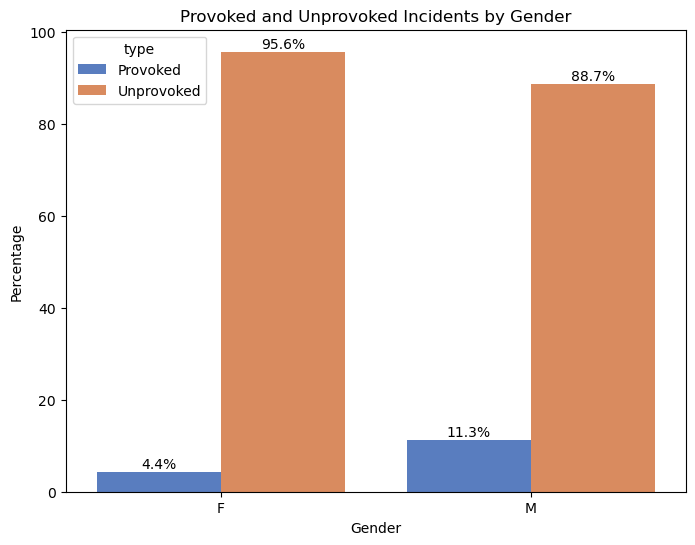

In [332]:
percentage_df = (100 * (dfsex.groupby(['sex', 'type']).size() / dfsex.groupby('sex').size())).reset_index(name='percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='percentage', hue='type', data=percentage_df, palette='muted')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Provoked and Unprovoked Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [333]:
sum((dfsex['type']=='Unprovoked') & (dfsex['sex']=='M'))

4276

In [334]:
sum((dfsex['type']=='Provoked') & (dfsex['sex']=='M'))

545

In [335]:
sum((dfsex['type']=='Unprovoked') & (dfsex['sex']=='F'))

658

In [336]:
sum((dfsex['type']=='Provoked') & (dfsex['sex']=='F'))

30

In [337]:
share_fem_prov = 100 * (sum((dfsex['type']=='Provoked') & (dfsex['sex']=='F')) / (sum((dfsex['type']=='Provoked') & (dfsex['sex']=='F')) + sum((dfsex['type']=='Unprovoked') & (dfsex['sex']=='F'))))

In [338]:
share_fem_prov

4.3604651162790695

In [339]:
share_male_prov = 100 * (sum((dfsex['type']=='Provoked') & (dfsex['sex']=='M')) / (sum((dfsex['type']=='Provoked') & (dfsex['sex']=='M')) + sum((dfsex['type']=='Unprovoked') & (dfsex['sex']=='M'))))

In [340]:
share_male_prov

11.30470856668741

In [341]:
df.activity.value_counts()

activity
Surfing                                                        1121
Swimming                                                        976
Fishing                                                         488
Spearfishing                                                    381
Wading                                                          174
                                                               ... 
Fishing boat swamped in a storm                                   1
Free diving (but on surface)                                      1
Adrift after the sinking of the motor yacht Princess Dianne       1
Free diving for abalone (submerged)                               1
Wreck of  large double sailing canoe                              1
Name: count, Length: 1587, dtype: int64

In [342]:
df.shape

(6944, 14)

In [343]:
df_act = df.activity.value_counts().reset_index()
df_act

,activity,count
0,Surfing,1121
1,Swimming,976
2,Fishing,488
3,Spearfishing,381
4,Wading,174
...,...,...
1582,Fishing boat swamped in a storm,1
1583,Free diving (but on surface),1
1584,Adrift after the sinking of the motor yacht Pr...,1
1585,Free diving for abalone (submerged),1


In [344]:
df_act[df_act['count'] > 5]

,activity,count
0,Surfing,1121
1,Swimming,976
2,Fishing,488
3,Spearfishing,381
4,Wading,174
5,Bathing,163
6,Diving,142
7,Snorkeling,129
8,Standing,113
9,Scuba diving,84


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6944 entries, 0 to 6944
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6943 non-null   object 
 1   year      6941 non-null   float64
 2   type      6925 non-null   object 
 3   country   6893 non-null   object 
 4   state     6461 non-null   object 
 5   location  6378 non-null   object 
 6   activity  6357 non-null   object 
 7   name      6723 non-null   object 
 8   sex       6364 non-null   object 
 9   age       3950 non-null   object 
 10  injury    6908 non-null   object 
 11  time      3418 non-null   object 
 12  species_  3811 non-null   object 
 13  source    6924 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [346]:
df_act.activity.str.match(r'fish').count()

1587

In [347]:
df_act2 = df.activity.reset_index()
df_act2_clean = df_act2.dropna()
df_act2_clean

,index,activity
0,0,Swimming
1,1,Surfing
2,2,Swimming
4,4,Fishing
5,5,Spearfishing
...,...,...
6937,6938,Swimming
6938,6939,Diving
6939,6940,Pearl diving
6940,6941,Swimming


In [348]:
count_fish = df_act2_clean['activity'].str.contains(r'fish', case=False).sum()
count_fish


1340

In [349]:
count_surf = df_act2_clean['activity'].str.contains(r'surf', case=False).sum()
count_surf

1433

In [350]:
count_swim = df_act2_clean['activity'].str.contains(r'swim', case=False).sum()
count_swim

1237

In [351]:
count_dive = df_act2_clean['activity'].str.contains(r'divi', case=False).sum()
count_dive

618

In [352]:
count_bath = df_act2_clean['activity'].str.contains(r'bath', case=False).sum()
count_bath

195

In [353]:
count_board = df_act2_clean['activity'].str.contains(r'board', case=False).sum()
count_board

393

In [354]:
df_age = df[['type', 'age']].dropna()
df_age

,type,age
0,Unprovoked,13
2,Unprovoked,11
3,Unprovoked,46
4,Unprovoked,32
6,Unprovoked,29
...,...,...
6885,Unprovoked,16
6896,Provoked,50
6907,Unprovoked,13 or 14
6918,Unprovoked,16


In [355]:
df_age['age'] = pd.to_numeric(df['age'], errors='coerce')
df_age = df_age.dropna()

In [356]:
df_age.type.value_counts()

type
Unprovoked             3171
Provoked                305
Invalid                 230
Watercraft               44
Sea Disaster             41
Questionable             15
?                         1
Under investigation       1
Name: count, dtype: int64

In [357]:
df_age = df_age.query("type == 'Unprovoked' or type == 'Provoked'")

In [358]:
df_age

,type,age
0,Unprovoked,13.0
2,Unprovoked,11.0
3,Unprovoked,46.0
4,Unprovoked,32.0
6,Unprovoked,29.0
...,...,...
6884,Unprovoked,6.0
6885,Unprovoked,16.0
6896,Provoked,50.0
6918,Unprovoked,16.0


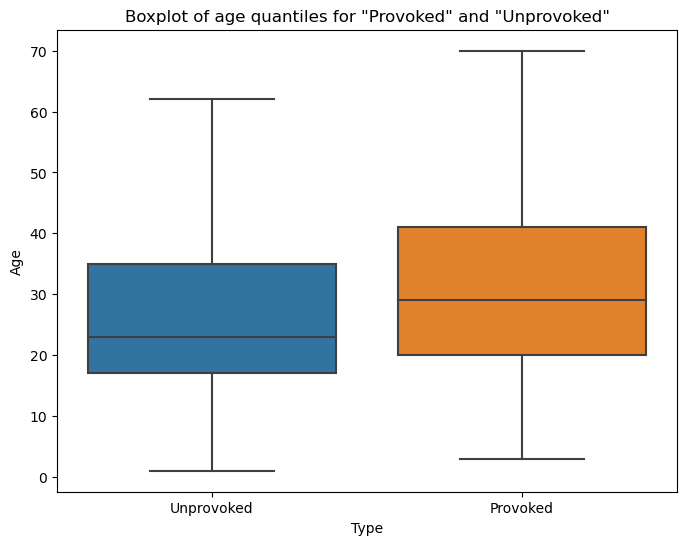

In [359]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='age', data=df_age, showfliers=False)
plt.title('Boxplot of age quantiles for "Provoked" and "Unprovoked"')
plt.xlabel('Type')
plt.ylabel('Age')
plt.show()

In [360]:
df['activity'] = df['activity'].str.replace(r'fish', 'fishing', regex=True)


In [361]:
mask = df['activity'].str.contains(r'fish', na=False, flags=re.IGNORECASE)
df.loc[mask, 'activity'] = 'fishing'
df.activity.value_counts()

activity
fishing                                                        1340
Surfing                                                        1121
Swimming                                                        976
Wading                                                          174
Bathing                                                         163
                                                               ... 
Sea Disaster Sinking of ferryboat Christina                       1
Motor launch Baby Princesa capsized with 22 people on board       1
Attempted to return injured shark to the sea                      1
Washing cooking pans                                              1
Wreck of  large double sailing canoe                              1
Name: count, Length: 1258, dtype: int64

In [362]:
mask2 = df['activity'].str.contains(r'swim', na=False, flags=re.IGNORECASE)
df.loc[mask2, 'activity'] = 'swimming'
df.activity.value_counts()

activity
fishing                                              1340
swimming                                             1223
Surfing                                              1121
Wading                                                174
Bathing                                               163
                                                     ... 
Scuba diving & U/W photography                          1
Free diving, collecting shells                          1
Hookah diving (submerged)                               1
Wreck of the 1689-ton Portuguese  coaster Angoche       1
Wreck of  large double sailing canoe                    1
Name: count, Length: 1076, dtype: int64

In [363]:
mask3 = df['activity'].str.contains(r'surf|board|row|kaya', na=False, flags=re.IGNORECASE)
df.loc[mask3, 'activity'] = 'equipment watersports'
df.activity.value_counts()

activity
equipment watersports                   1761
fishing                                 1340
swimming                                1223
Wading                                   174
Bathing                                  163
                                        ... 
Paddling rescue ski                        1
Floating in tube                           1
Bather                                     1
Wreck of  large double sailing canoe       1
Name: count, Length: 832, dtype: int64

In [364]:
mask4 = df['activity'].str.contains(r'bath|stand|walk|wad|tread', na=False, flags=re.IGNORECASE)
df.loc[mask4, 'activity'] = 'light activities'
df.activity.value_counts()

activity
equipment watersports                     1761
fishing                                   1340
swimming                                  1223
light activities                           579
Diving                                     142
                                          ... 
Wreck of the Storm King                      1
Sinking of the ferryboat Dumaguete           1
Playing with a frisbee in the shallows       1
Leaving the water                            1
Wreck of  large double sailing canoe         1
Name: count, Length: 756, dtype: int64

In [365]:
mask5 = df['activity'].str.contains(r'divi|dive|snork', na=False, flags=re.IGNORECASE)
df.loc[mask5, 'activity'] = 'diving/snorkeling'
df.activity.value_counts()

activity
equipment watersports                     1761
fishing                                   1340
swimming                                  1223
diving/snorkeling                          675
light activities                           579
                                          ... 
Picking up shark by the tail                 1
Schooner sank during a storm                 1
Leaving the water                            1
Playing with a frisbee in the shallows       1
Wreck of  large double sailing canoe         1
Name: count, Length: 591, dtype: int64

In [366]:
dfact = df.drop(df[(df['activity'] != 'equipment watersports') & (df['activity'] != 'fishing') & (df['activity'] != 'swimming') & (df['activity'] != 'diving/snorkeling') & (df['activity'] != 'diving/snorkeling')].index)
dfact

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",equipment watersports,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
5,04-Feb-2024,2024.0,Provoked,TRINIDAD,NaN,NaN,fishing,male,M,NaN,Shoulder bitten,06h30,Blacktip reef shark,"Trinidad Guardian, 2/11/2014"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,swimming,Arab boy,M,NaN,FATAL,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz..."
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,diving/snorkeling,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,diving/snorkeling,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"


In [367]:
dfact = dfact.drop(dfact[(dfact['type'] != 'Provoked') & (dfact['type'] != 'Unprovoked')].index)
dfact

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",equipment watersports,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
6,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",swimming,Lauren O'Neill,F,29,Right leg bitten,20h00,Bull shark,"Nine News, 12/31/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,swimming,Arab boy,M,NaN,FATAL,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz..."
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,diving/snorkeling,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,diving/snorkeling,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"


In [368]:
dfactonly = dfact[["activity", "type"]]
dfactonly

,activity,type
0,swimming,Unprovoked
1,equipment watersports,Unprovoked
2,swimming,Unprovoked
4,fishing,Unprovoked
6,swimming,Unprovoked
...,...,...
6938,swimming,Unprovoked
6939,diving/snorkeling,Unprovoked
6940,diving/snorkeling,Unprovoked
6941,swimming,Unprovoked


In [369]:
dfactonly.type.unique()

array(['Unprovoked', 'Provoked'], dtype=object)

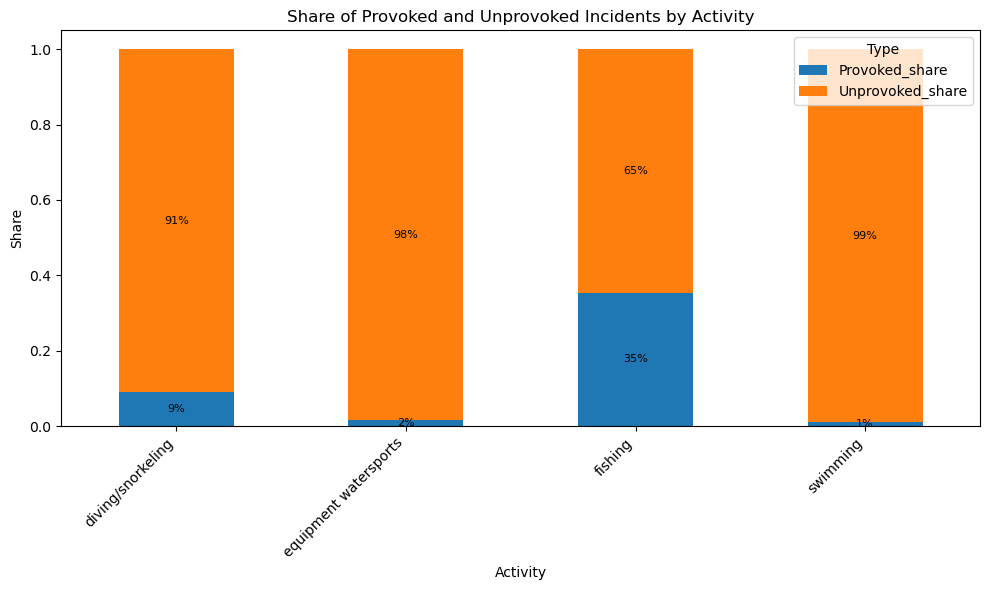

In [370]:
grouped = dfactonly.groupby(['activity', 'type']).size().unstack(fill_value=0)

grouped['Total'] = grouped.sum(axis=1)
grouped['Provoked_share'] = grouped['Provoked'] / grouped['Total']
grouped['Unprovoked_share'] = grouped['Unprovoked'] / grouped['Total']

ax = grouped[['Provoked_share', 'Unprovoked_share']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Share of Provoked and Unprovoked Incidents by Activity')
plt.xlabel('Activity')
plt.ylabel('Share')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Type')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0%}'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.tight_layout()
plt.show()

In [371]:
dfact.sex.value_counts()

sex
M      3768
F       448
M         2
lli       1
Name: count, dtype: int64

In [372]:
dfactsex = dfact.drop(dfact[(dfact['sex'] != 'M') & (dfact['sex'] != 'F')].index)
dfactsex


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species_,source
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,swimming,Brooklyn Sauer,F,13,"Minor injuries to back, abdomen and legs",16h00,Tiger shark,"Yahoo News, 3/15/2024"
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",equipment watersports,Matthew White,M,NaN,"No injury, shark bit surfboard",NaN,Tiger shark 8',"Surfer, 3/6/2024F"
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",swimming,NaN,F,11,Lacerations to left foot,13h30,3' to 4' shark,"Hawaii News Now, 3/4/2024"
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",fishing,Vicky Suresh Govari,M,32,Calf of lower left leg injured,NaN,"Bull shark, 7'","Times of India, 2/14/2024"
6,29 Jan-2024,2024.0,Unprovoked,AUSTRALIA,New South Wales,"Elizabeth Bay, Sydney Harbor",swimming,Lauren O'Neill,F,29,Right leg bitten,20h00,Bull shark,"Nine News, 12/31/2024"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6938,Before 1906,0.0,Unprovoked,AUSTRALIA,New South Wales,,swimming,Arab boy,M,NaN,FATAL,NaN,Said to involve a grey nurse shark that leapt ...,"L. Becke in New York Sun, 9/9/1906; L. Schultz..."
6939,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,diving/snorkeling,male,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, p. 234"
6940,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,diving/snorkeling,Ahmun,M,NaN,FATAL,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234"
6941,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,swimming,Coast Guard personnel,M,NaN,FATAL,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF"


In [373]:
dfactsex1 = dfactsex[["activity", "sex"]]
dfactsex1

,activity,sex
0,swimming,F
1,equipment watersports,M
2,swimming,F
4,fishing,M
6,swimming,F
...,...,...
6938,swimming,M
6939,diving/snorkeling,M
6940,diving/snorkeling,M
6941,swimming,M


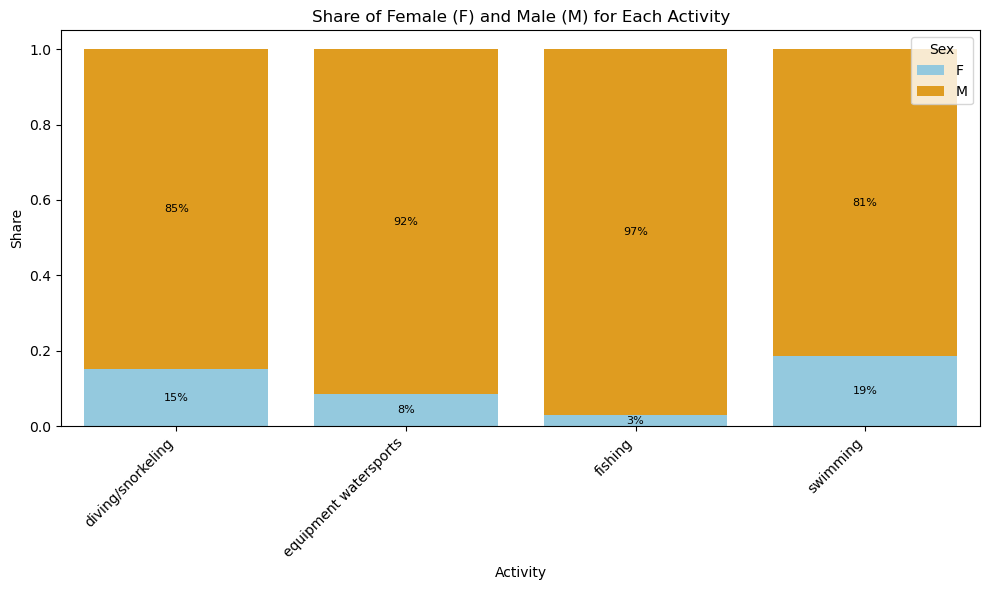

In [374]:
grouped = dfactsex1.groupby(['activity', 'sex']).size().unstack(fill_value=0)


grouped['Total'] = grouped.sum(axis=1)

grouped['F_share'] = grouped['F'] / grouped['Total']
grouped['M_share'] = grouped['M'] / grouped['Total']


plt.figure(figsize=(10, 6))
sns.barplot(x='activity', y='F_share', data=grouped.reset_index(), color='skyblue', label='F')
sns.barplot(x='activity', y='M_share', data=grouped.reset_index(), color='orange', label='M', bottom=grouped['F_share'])


for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.gca().annotate('{:.0%}'.format(height), (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.title('Share of Female (F) and Male (M) for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Share')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sex')
plt.tight_layout()
plt.show()

In [375]:
dfactsex2 = dfactsex[['type', 'sex', 'activity']]
dfactsex2.activity.value_counts()

activity
equipment watersports    1569
swimming                 1070
fishing                   991
diving/snorkeling         586
Name: count, dtype: int64

In [376]:
dfactsex2.activity.value_counts()

activity
equipment watersports    1569
swimming                 1070
fishing                   991
diving/snorkeling         586
Name: count, dtype: int64

In [377]:
dfsexswim = dfactsex2[dfactsex2['activity'] == 'swimming']
dfsexswim = dfsexswim.drop('activity', axis=1)
dfsexswim

,type,sex
0,Unprovoked,F
2,Unprovoked,F
6,Unprovoked,F
7,Unprovoked,M
20,Unprovoked,F
...,...,...
6930,Unprovoked,M
6933,Unprovoked,M
6938,Unprovoked,M
6941,Unprovoked,M


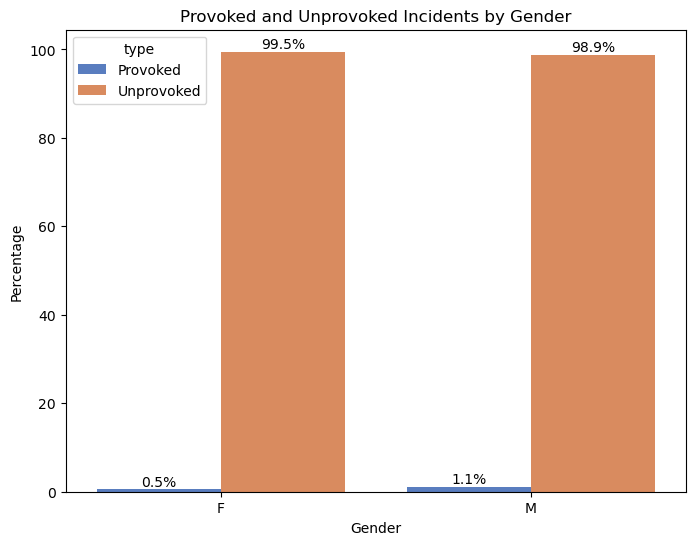

In [378]:
percentage_df = (100 * (dfsexswim.groupby(['sex', 'type']).size() / dfsexswim.groupby('sex').size())).reset_index(name='percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='percentage', hue='type', data=percentage_df, palette='muted')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Provoked and Unprovoked Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [379]:
dfsexswim.type.value_counts()

type
Unprovoked    1059
Provoked        11
Name: count, dtype: int64

In [380]:
dfsexdiv = dfactsex2[dfactsex2['activity'] == 'diving/snorkeling']
dfsexdiv = dfsexdiv.drop('activity', axis=1)
dfsexdiv

,type,sex
11,Unprovoked,M
18,Unprovoked,M
22,Unprovoked,F
23,Unprovoked,F
26,Unprovoked,M
...,...,...
6910,Unprovoked,M
6917,Unprovoked,M
6922,Unprovoked,M
6939,Unprovoked,M


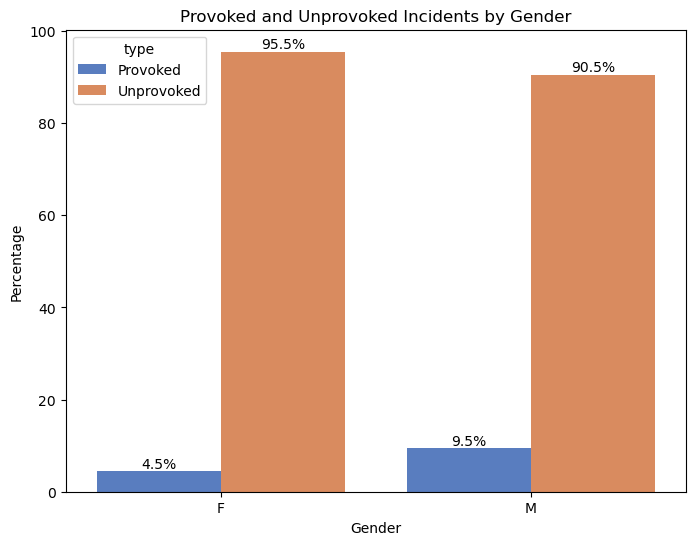

In [381]:
percentage_df = (100 * (dfsexdiv.groupby(['sex', 'type']).size() / dfsexdiv.groupby('sex').size())).reset_index(name='percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='percentage', hue='type', data=percentage_df, palette='muted')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Provoked and Unprovoked Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [382]:
dfsexequip = dfactsex2[dfactsex2['activity'] == 'equipment watersports']
dfsexequip = dfsexequip.drop('activity', axis=1)
dfsexequip

,type,sex
1,Unprovoked,M
8,Unprovoked,M
10,Unprovoked,M
12,Unprovoked,M
13,Unprovoked,M
...,...,...
6783,Unprovoked,M
6784,Unprovoked,M
6806,Unprovoked,M
6843,Unprovoked,M


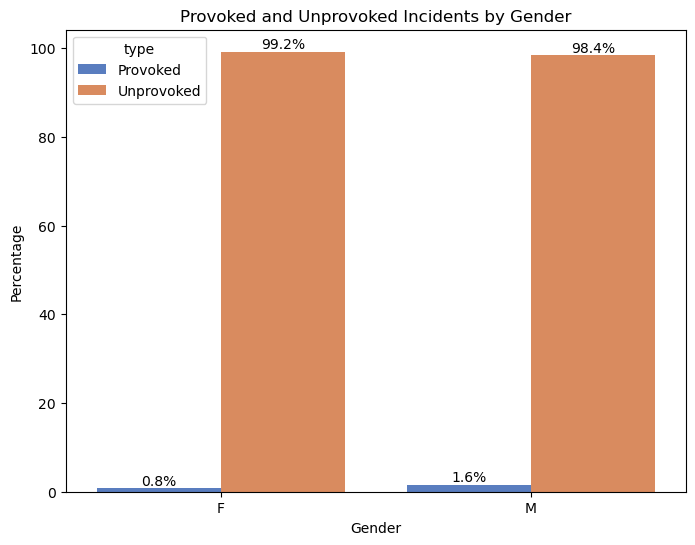

In [383]:
percentage_df = (100 * (dfsexequip.groupby(['sex', 'type']).size() / dfsexequip.groupby('sex').size())).reset_index(name='percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='percentage', hue='type', data=percentage_df, palette='muted')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Provoked and Unprovoked Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [384]:
dfsexfish = dfactsex2[dfactsex2['activity'] == 'fishing']
dfsexfish = dfsexfish.drop('activity', axis=1)
dfsexfish

,type,sex
4,Unprovoked,M
9,Provoked,M
25,Unprovoked,M
30,Provoked,M
42,Unprovoked,M
...,...,...
6925,Unprovoked,M
6931,Unprovoked,M
6935,Unprovoked,M
6936,Unprovoked,M


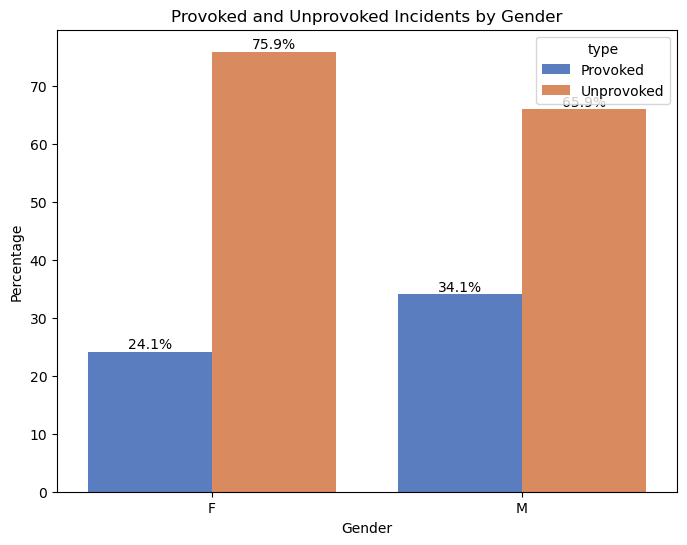

In [385]:
percentage_df = (100 * (dfsexfish.groupby(['sex', 'type']).size() / dfsexfish.groupby('sex').size())).reset_index(name='percentage')

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='sex', y='percentage', hue='type', data=percentage_df, palette='muted')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Provoked and Unprovoked Incidents by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()